<a href="https://colab.research.google.com/github/paulahruizpro-ux/Alura-Store-Challenge/blob/main/Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relatório** **Final** **Alura Store Challenge**


## **Introdução**

Este projeto analisou os dados de vendas, valores de frete e avaliações de 4 lojas rede Alura Store com o objetivo de apoiar a tomada de decisão sobre qual loja deve ser vendida para permitir o ínicio de um novo empreendimento.

Para complementar as informações obtidas por meio da manipulação dos dados das lojas, foram desenvolvidos gráficos, que serão explorados no desenvolvimento deste relatório.

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## **1 Análise do Faturamento**

In [4]:
lista_lojas = [loja, loja2, loja3, loja4]

def calculo_faturamento(dataframe, coluna_preco = 'Preço'):
  if coluna_preco in dataframe.columns:
    faturamento = dataframe[coluna_preco].sum()
    return faturamento
  else:
    print(f'Erro: A coluna {coluna_preco} não foi encontrada no dataframe.')

faturamentos = []

for i, df in enumerate(lista_lojas):
  faturamento_atual = calculo_faturamento(df, 'Preço')
  faturamentos.append(faturamento_atual)
  print(f'O faturamento total da loja {i+1} foi de R$ {faturamento_atual}')




O faturamento total da loja 1 foi de R$ 1534509.12
O faturamento total da loja 2 foi de R$ 1488459.06
O faturamento total da loja 3 foi de R$ 1464025.03
O faturamento total da loja 4 foi de R$ 1384497.58


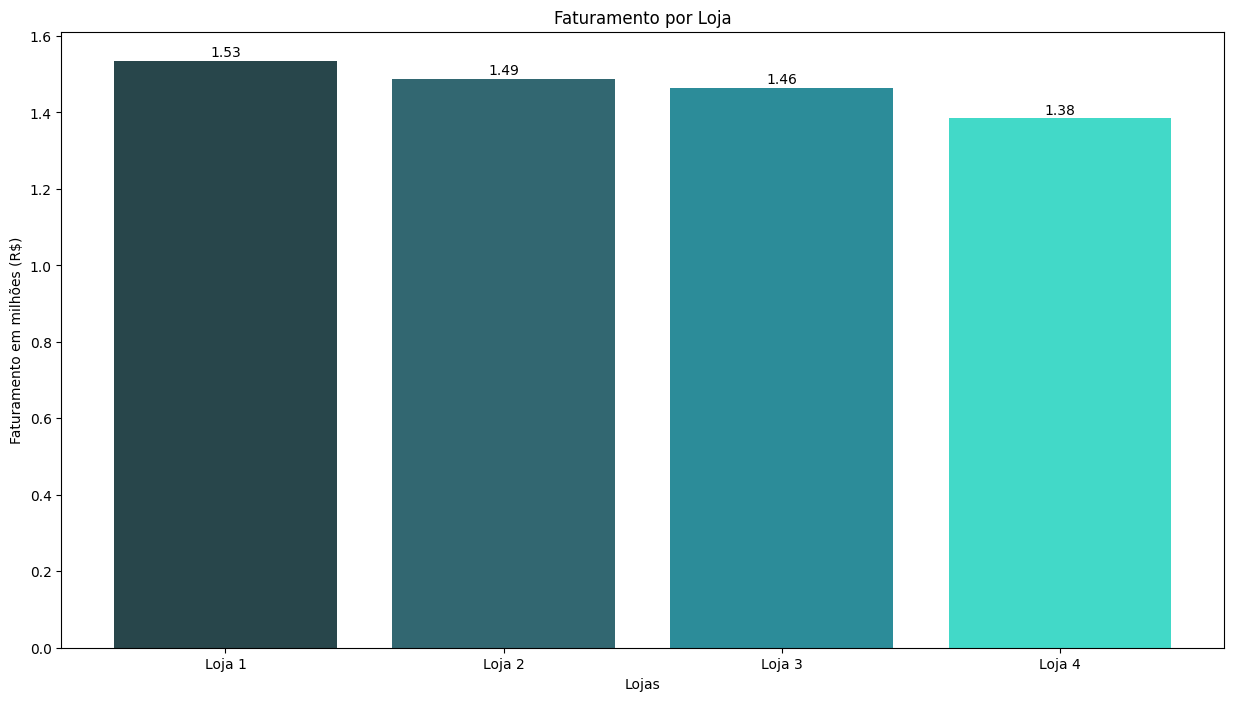

In [29]:
lista_lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

def calculo_faturamento(dataframe, coluna_preco = 'Preço'):
  if coluna_preco in dataframe.columns:
    faturamento = round(dataframe[coluna_preco].sum(), 2)
    return faturamento
  else:
    print(f'Erro: A coluna {coluna_preco} não foi encontrada no dataframe.')

faturamentos = []

for i, df in enumerate(lista_lojas):
  faturamento_atual = calculo_faturamento(df, 'Preço')
  faturamentos.append(faturamento_atual)
indices_x = range(len(lista_lojas))
y = np.array(faturamentos)

fig, ax = plt.subplots(figsize= (15,8))
barra = ax.bar(nomes_lojas, y / 1e6, color = ['#28464b','#326771','#2c8c99','#42d9c8'])
ax.bar_label(barra, labels =[f'{v:.2f}' for v in y / 1e6],
             padding=1, fontsize=10,color='black')
ax.set_xlabel('Lojas')
ax.set_ylabel('Faturamento em milhões (R$)')
ax.set_title('Faturamento por Loja')

plt.show()

In [5]:
#quantidade de produtos vendidos por categoria
#agrupar os dados por categoria e contar o número de vendas de cada tipo, mostrando as mais populares
for i, df in enumerate(lista_lojas):
  numero_vendas = df['Categoria do Produto'].value_counts()
  numero_vendas.index = numero_vendas.index.str.capitalize()
  print(f'---Vendas por Categoria na Loja {i+1}---')
  print(numero_vendas)
  print('\n')

---Vendas por Categoria na Loja 1---
Categoria do Produto
Moveis                   465
Eletronicos              448
Brinquedos               324
Eletrodomesticos         312
Esporte e lazer          284
Instrumentos musicais    182
Livros                   173
Utilidades domesticas    171
Name: count, dtype: int64


---Vendas por Categoria na Loja 2---
Categoria do Produto
Moveis                   442
Eletronicos              422
Brinquedos               313
Eletrodomesticos         305
Esporte e lazer          275
Instrumentos musicais    224
Livros                   197
Utilidades domesticas    181
Name: count, dtype: int64


---Vendas por Categoria na Loja 3---
Categoria do Produto
Moveis                   499
Eletronicos              451
Brinquedos               315
Eletrodomesticos         278
Esporte e lazer          277
Livros                   185
Instrumentos musicais    177
Utilidades domesticas    177
Name: count, dtype: int64


---Vendas por Categoria na Loja 4---
Categoria

## Média de Avaliações por Loja


In [7]:
for i, df in enumerate(lista_lojas):
  calculo_media = round(df['Avaliação da compra'].mean(), 2)
  print(f'Média de Avaliações da Loja {i+1}: {calculo_media}')


Média de Avaliações da Loja 1: 3.98
Média de Avaliações da Loja 2: 4.04
Média de Avaliações da Loja 3: 4.05
Média de Avaliações da Loja 4: 4.0


In [8]:
for i, df in enumerate(lista_lojas):
  vendas = df['Categoria do Produto'].value_counts()
  vendas.index = vendas.index.str.capitalize()

  maiores_vendas = vendas.max()
  menores_vendas = vendas.min()

  categoria_maior = vendas.idxmax()
  categoria_menor = vendas.idxmin()
  print(f'---Maior e menor quantidade de vendas por Categoria da loja {i + 1}---')
  print(f'A categoria {categoria_maior} teve a maior quantidade de vendas: {maiores_vendas} ')
  print(f'A categoria {categoria_menor} teve a menor quantidade de vendas: {menores_vendas}')
  print('\n')

---Maior e menor quantidade de vendas por Categoria da loja 1---
A categoria Moveis teve a maior quantidade de vendas: 465 
A categoria Utilidades domesticas teve a menor quantidade de vendas: 171


---Maior e menor quantidade de vendas por Categoria da loja 2---
A categoria Moveis teve a maior quantidade de vendas: 442 
A categoria Utilidades domesticas teve a menor quantidade de vendas: 181


---Maior e menor quantidade de vendas por Categoria da loja 3---
A categoria Moveis teve a maior quantidade de vendas: 499 
A categoria Instrumentos musicais teve a menor quantidade de vendas: 177


---Maior e menor quantidade de vendas por Categoria da loja 4---
A categoria Moveis teve a maior quantidade de vendas: 480 
A categoria Instrumentos musicais teve a menor quantidade de vendas: 170




Frete Médio por Loja

In [9]:
for i, df in enumerate(lista_lojas):
  media_frete = round(df['Frete'].mean(),2)
  print(f'A média do frete na Loja {i+1} foi de: R$ {media_frete}')

A média do frete na Loja 1 foi de: R$ 34.69
A média do frete na Loja 2 foi de: R$ 33.62
A média do frete na Loja 3 foi de: R$ 33.07
A média do frete na Loja 4 foi de: R$ 31.28


In [10]:
import matplotlib.pyplot as plt
import numpy as np

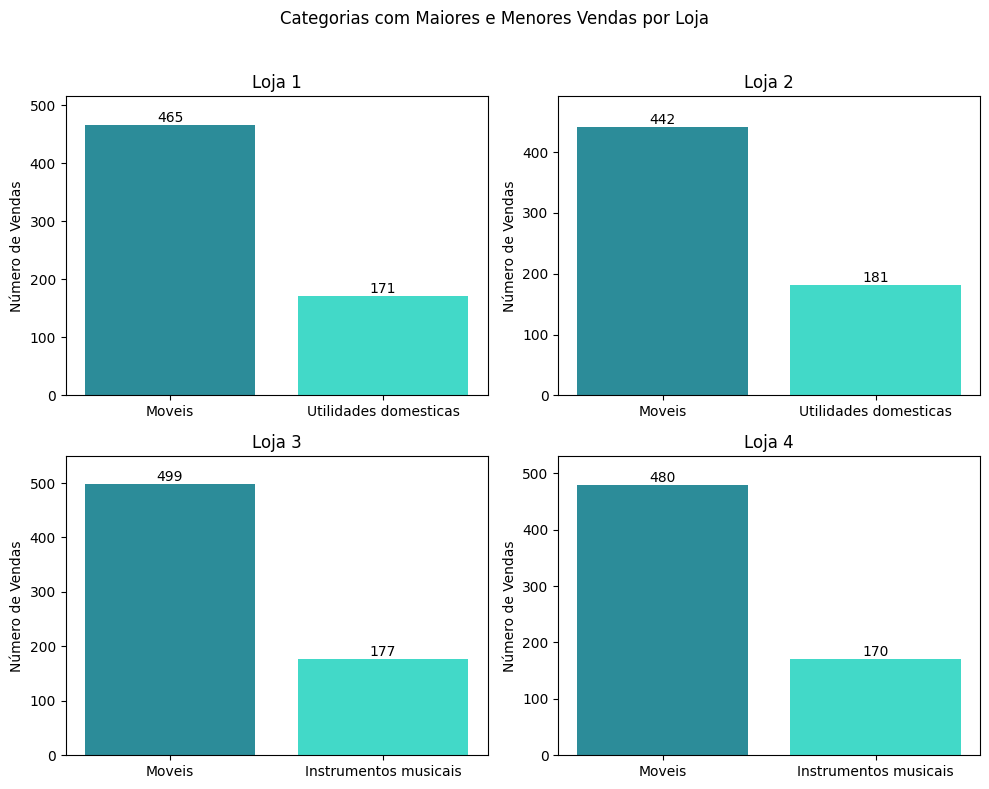

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('Categorias com Maiores e Menores Vendas por Loja')

for i, df in enumerate(lista_lojas):
  vendas = df['Categoria do Produto'].value_counts()
  vendas.index = vendas.index.str.capitalize()

  maiores_vendas = vendas.max()
  menores_vendas = vendas.min()

  categoria_maior = vendas.idxmax()
  categoria_menor = vendas.idxmin()

  ax = axs[i//2, i%2]  #definir qual é a linha e coluna que cada gráfico será

  barras = ax.bar([categoria_maior, categoria_menor], [maiores_vendas, menores_vendas], color = ['#2c8c99', '#42d9c8'])

  ax.bar_label(barras)

  ax.set_title(f'Loja {i+1}')
  ax.set_ylabel('Número de Vendas')
  ax.set_ylim(0, maiores_vendas + 50)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
from numpy._core.defchararray import index
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for i, df in enumerate(lista_lojas):
  numero_vendas = df['Categoria do Produto'].value_counts()
  numero_vendas.index = numero_vendas.index.str.capitalize()

  #criar gráfico de pizza
  plt.pie(numero_vendas,
          labels=numero_vendas.index, #nomes das categorias
          autopct='%1.1f%%', #mostra a porcentagem
          startangle=90,
          colors=plt.cm.Paired.colors)
  plt.figure(figsize=(15,8))
  plt.title(f'Vendas por Categoria - {nomes_lojas[i]}')
  plt.show()
  print('\n')


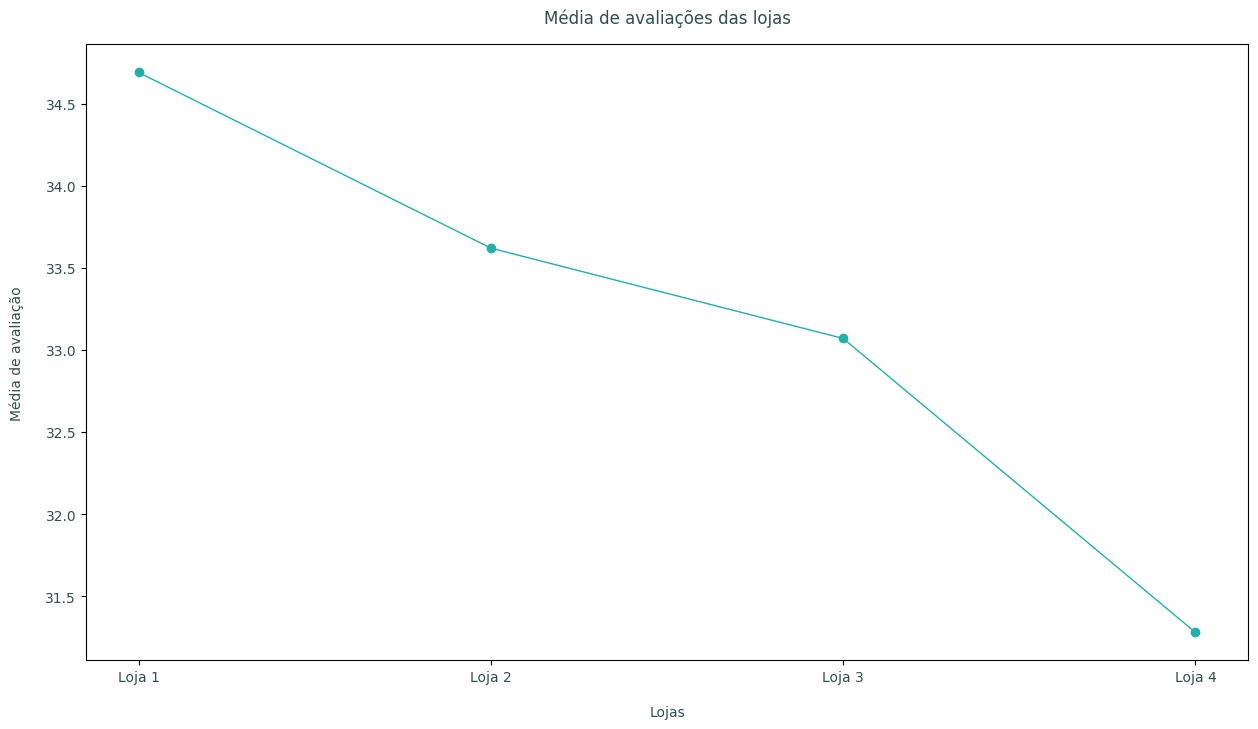

In [43]:
medias = []
for i, df in enumerate(lista_lojas):
  media_frete = round(df['Frete'].mean(),2)
  medias.append(media_frete)

plt.figure(figsize=(15,8))

plt.plot(nomes_lojas, medias, marker='o', color='lightseagreen', linestyle='-', linewidth=1)
plt.title(f'Média de avaliações das lojas', color='darkslategray', pad=15)
plt.xticks(color='darkslategray')
plt.yticks(color='darkslategray')
plt.xlabel('Lojas', color='darkslategray', labelpad=15)
plt.ylabel('Média de avaliação', color='darkslategray', labelpad=15)

plt.show()


In [14]:
import matplotlib.pyplot as plt

for i, df in enumerate(lista_lojas):
    numero_vendas = df['Categoria do Produto'].value_counts()
    numero_vendas.index = numero_vendas.index.str.capitalize()

    plt
